In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pickle

In [0]:
X_train = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_train.p', 'rb'))
y_train = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/y_train.p', 'rb'))
X_test  = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_test.p', 'rb'))
y_test  = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/y_test.p', 'rb'))
X_dev   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_dev.p', 'rb'))
y_dev   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/y_dev.p', 'rb'))

In [14]:
X_train.shape, X_test.shape, X_dev.shape

((500, 1000, 1), (100, 1000, 1), (100, 2000, 1))

In [0]:
y_train.shape, y_test.shape, y_dev.shape

((500, 1000), (100, 1000), (100, 2000))

# Fitting sampled data into Gaussian Process

Trying out Gaussian Process through scikit-learn

In [0]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ConstantKernel, ExpSineSquared, RationalQuadratic


In [0]:
kernel_1 = ExpSineSquared(length_scale=2, periodicity=2)
kernel_2 = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)
kernel_3 = Matern(length_scale=2, nu=3/2)
kernel_4 = RationalQuadratic()
kernel_5 = RBF(length_scale=2)

In [0]:
gp_1 = gaussian_process.GaussianProcessRegressor(kernel=kernel_1, alpha=1e-1, n_restarts_optimizer=10, normalize_y=True)
gp_2 = gaussian_process.GaussianProcessRegressor(kernel=kernel_2, alpha=1e-1, n_restarts_optimizer=10, normalize_y=True)
gp_3 = gaussian_process.GaussianProcessRegressor(kernel=kernel_3, alpha=1e-1, n_restarts_optimizer=10, normalize_y=True)
gp_4 = gaussian_process.GaussianProcessRegressor(kernel=kernel_4, alpha=1e-1, n_restarts_optimizer=10, normalize_y=True)
gp_5 = gaussian_process.GaussianProcessRegressor(kernel=kernel_5, alpha=1e-1, n_restarts_optimizer=10, normalize_y=True)


In [18]:
X_train[5].reshape(-1,1).shape, y_train[5].reshape(-1,1).shape, X_test.reshape(-1,1).shape

((1000, 1), (1000, 1), (100000, 1))

In [0]:
import matplotlib.pyplot as plt

In [0]:
def residual(true_val, pred_val, sigma):
  return (true_val.reshape(-1,1) - pred_val.reshape(-1,1))/sigma.reshape(-1,1)

In [21]:
gp_1.fit(X_train[5].reshape(-1,1), y_train[5].reshape(-1,1))
y_pred, sigma = gp_1.predict(X_test[5].reshape(-1,1), return_std=True)

/usr/local/lib/python3.6/dist-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-3.48824776e+00, -7.15285879e+09]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  ConvergenceWarning)


AttributeError: ignored

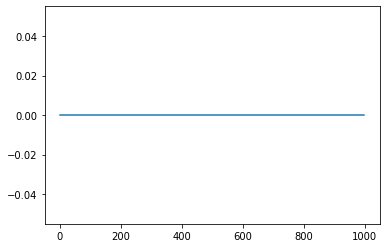

In [24]:
plot = plt.plot(y_pred)
plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_gp/mean.svg')

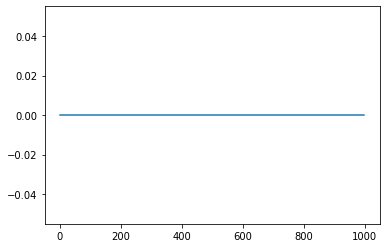

In [0]:
plt.plot(y_pred)

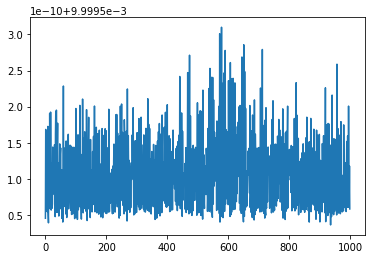

In [0]:
plt.plot(sigma)

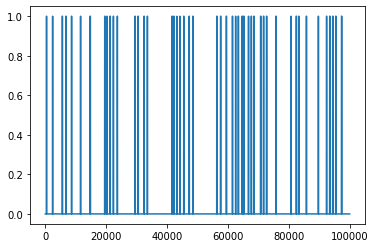

In [0]:
plt.plot(y_test.reshape(-1,1))

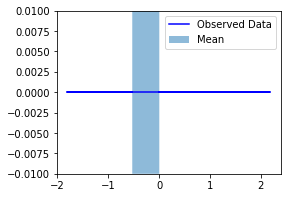

In [0]:
# Plotting the confidence bounds
f, ax = plt.subplots(1, 1, figsize=(4, 3))
# Get upper and lower confidence bounds
lower = y_pred.reshape(1000) - sigma
upper = y_pred.reshape(1000) + sigma
# Plot training data as black stars
#ax.plot(X_train[5].reshape(-1,1), y_train[5].reshape(-1,1), 'k*')
# Plot predictive means as blue line
ax.plot(X_test[5].reshape(-1,1), y_pred, 'b')
# Shade between the lower and upper confidence bounds
ax.fill_between(X_test[5].reshape(1000), lower, upper, alpha=0.5)
ax.set_ylim([-0.01, 0.01])
ax.legend(['Observed Data', 'Mean', 'Confidence'])

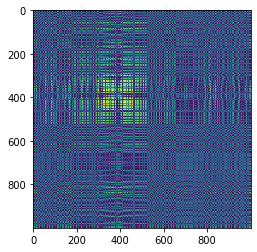

In [0]:
plt.imshow(cov, interpolation='nearest')

In [0]:
gp1_res = residual(y_test[5], y_pred, sigma)

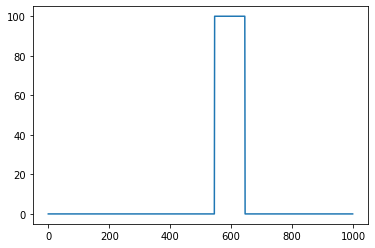

In [0]:
plt.plot(gp1_res)

In [0]:
gp_2.fit(X_train[5].reshape(-1,1), y_train[5].reshape(-1,1))
y_pred, sigma = gp_2.predict(X_test.reshape(-1,1), return_std=True)

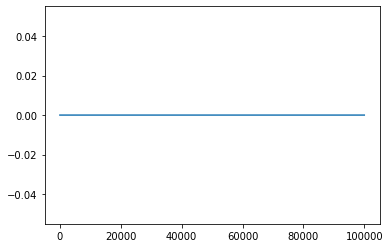

In [0]:
plt.plot(y_pred)

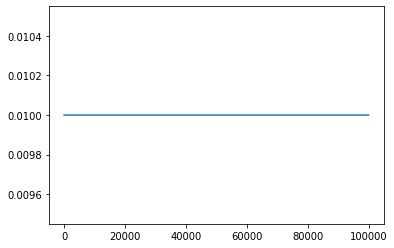

In [0]:
plt.plot(sigma)

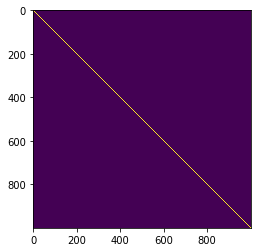

In [0]:
plt.imshow(cov, interpolation='nearest')

In [0]:
gp2_res = residual(y_test, y_pred, sigma)

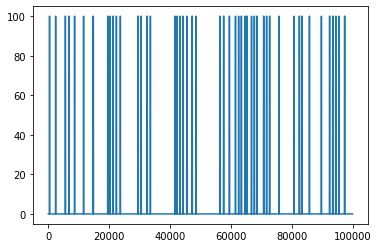

In [0]:
plt.plot(gp2_res)

In [0]:
gp_3.fit(X_train[5].reshape(-1,1), y_train[5].reshape(-1,1))
y_pred, sigma = gp_2.predict(X_test.reshape(-1,1), return_std=True)

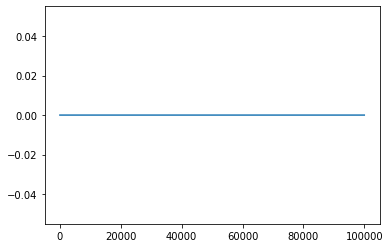

In [0]:
plt.plot(y_pred)

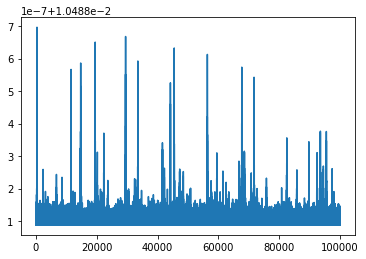

In [0]:
plt.plot(sigma)

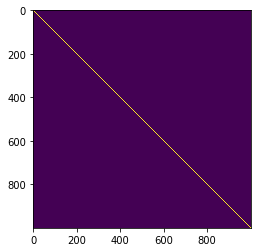

In [0]:
plt.imshow(cov, interpolation='nearest')

In [0]:
gp3_res = residual(y_test, y_pred, sigma)

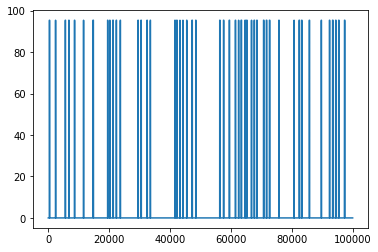

In [0]:
plt.plot(gp3_res)

In [0]:
gp_4.fit(X_train[5].reshape(-1,1), y_train[5].reshape(-1,1))
y_pred, sigma = gp_4.predict(X_test.reshape(-1,1), return_std=True)

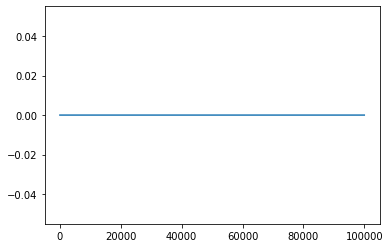

In [0]:
plt.plot(y_pred)

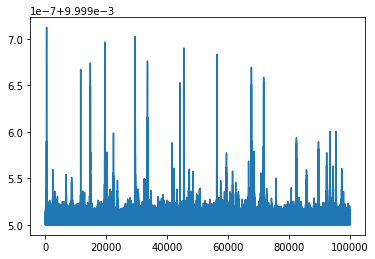

In [0]:
plt.plot(sigma)

In [0]:
sigma

array([0.0099995 , 0.0099995 , 0.00999951, ..., 0.0099995 , 0.00999952,
       0.0099995 ])

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


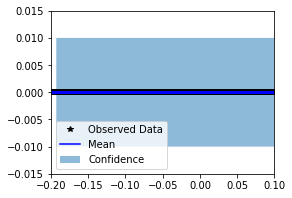

In [0]:
# Plotting the confidence bounds
f, ax = plt.subplots(1, 1, figsize=(4, 3))
# Get upper and lower confidence bounds
lower = y_pred.reshape(100000) - sigma
upper = y_pred.reshape(100000) + sigma
# Plot training data as black stars
ax.plot(X_train.reshape(500000), y_train.reshape(500000), 'k*')
# Plot predictive means as blue line
ax.plot(X_test.reshape(-1,1), y_pred, 'b')
# Shade between the lower and upper confidence bounds
ax.fill_between(X_test.reshape(100000), lower, upper, alpha=0.5)
ax.set_ylim([-0.015, 0.015])
ax.set_xlim([-0.2, 0.1])
ax.legend(['Observed Data', 'Mean', 'Confidence'])

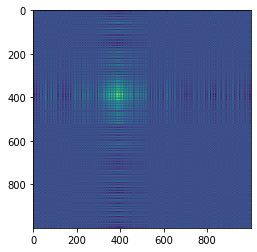

In [0]:
plt.imshow(cov, interpolation='nearest')

In [0]:
gp4_res = residual(y_test, y_pred, sigma)

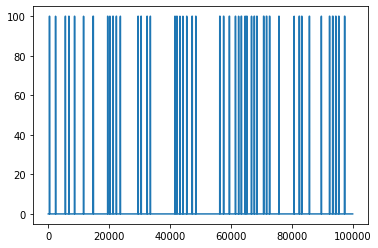

In [0]:
plt.plot(gp4_res)

In [0]:
gp_5.fit(X_train[5].reshape(-1,1), y_train[5].reshape(-1,1))
y_pred, std = gp_5.predict(X_test.reshape(-1,1), return_std=True)

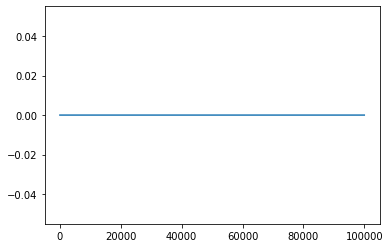

In [0]:
plt.plot(y_pred)

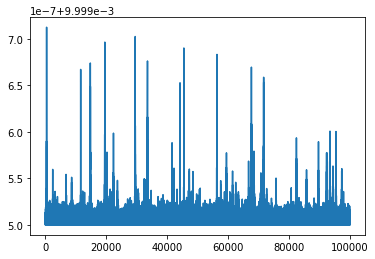

In [0]:
plt.plot(sigma)

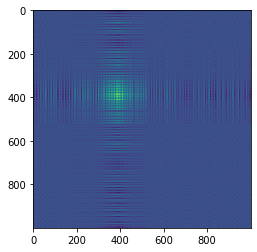

In [0]:
plt.imshow(cov, interpolation='nearest')

In [0]:
gp5_res = residual(y_test, y_pred, sigma)

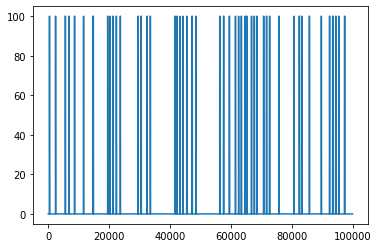

In [0]:
plt.plot(gp5_res)

Gaussian Process with Spectral mixture kernel

In [0]:
pip install gpytorch

     |████████████████████████████████| 215kB 4.7MB/s 
  Created wheel for gpytorch: filename=gpytorch-0.3.6-py2.py3-none-any.whl size=351085 sha256=59a9f17410e5ad9c0b9d2a726c32638b4dcdc77c4197d4d705018eddbabda247
  Stored in directory: /root/.cache/pip/wheels/41/7f/81/d3961e5205b2e7146b489cbcd5eb612384c885f7216b654852
Successfully built gpytorch


In [0]:
import math
import torch
import gpytorch

class SpectralMixtureGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(SpectralMixtureGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.SpectralMixtureKernel(num_mixtures=4)
        self.covar_module.initialize_from_data(train_x, train_y)

    def forward(self,x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)


likelihood = gpytorch.likelihoods.GaussianLikelihood()
X = torch.tensor(X_train[5].reshape(1000))
y = torch.tensor(y_train[5].reshape(1000))
X= X.type(torch.FloatTensor)
y= y.type(torch.FloatTensor)
gp_6 = SpectralMixtureGPModel(X, y, likelihood)

# Find optimal model hyperparameters
gp_6.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam(gp_6.parameters(), lr=0.1)

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, gp_6)



In [0]:
training_iter = 100
for i in range(training_iter):
    optimizer.zero_grad()
    output = gp_6(X)
    loss = -mll(output, y)
    loss.backward()
    print('Iter %d/%d - Loss: %.3f' % (i + 1, training_iter, loss.item()))
    optimizer.step()

/usr/local/lib/python3.6/dist-packages/gpytorch/lazy/added_diag_lazy_tensor.py:62: UserWarning: NaNs encountered in preconditioner computation. Attempting to continue without preconditioning.
  "NaNs encountered in preconditioner computation. Attempting to continue without preconditioning."


Iter 1/100 - Loss: 0.736
Iter 2/100 - Loss: 0.699
Iter 3/100 - Loss: 0.662
Iter 4/100 - Loss: 0.624
Iter 5/100 - Loss: 0.585
Iter 6/100 - Loss: 0.546
Iter 7/100 - Loss: 0.505
Iter 8/100 - Loss: 0.464
Iter 9/100 - Loss: 0.422
Iter 10/100 - Loss: 0.380
Iter 11/100 - Loss: 0.336
Iter 12/100 - Loss: 0.292
Iter 13/100 - Loss: 0.248
Iter 14/100 - Loss: 0.203
Iter 15/100 - Loss: 0.157
Iter 16/100 - Loss: 0.111
Iter 17/100 - Loss: 0.064
Iter 18/100 - Loss: 0.017
Iter 19/100 - Loss: -0.031
Iter 20/100 - Loss: -0.080
Iter 21/100 - Loss: -0.128
Iter 22/100 - Loss: -0.177
Iter 23/100 - Loss: -0.227
Iter 24/100 - Loss: -0.276
Iter 25/100 - Loss: -0.327
Iter 26/100 - Loss: -0.377
Iter 27/100 - Loss: -0.428
Iter 28/100 - Loss: -0.478
Iter 29/100 - Loss: -0.529
Iter 30/100 - Loss: -0.581
Iter 31/100 - Loss: -0.632
Iter 32/100 - Loss: -0.684
Iter 33/100 - Loss: -0.736
Iter 34/100 - Loss: -0.787
Iter 35/100 - Loss: -0.839
Iter 36/100 - Loss: -0.892
Iter 37/100 - Loss: -0.944
Iter 38/100 - Loss: -0.996
I

In [0]:
# Test points every 0.1 between 0 and 5
test_x = torch.tensor(X_test.reshape(1000))
test_x = test_x.type(torch.FloatTensor)
# Get into evaluation (predictive posterior) mode
gp_6.eval()
likelihood.eval()


GaussianLikelihood(
  (quadrature): GaussHermiteQuadrature1D()
  (noise_covar): HomoskedasticNoise(
    (raw_noise_constraint): GreaterThan(1.000E-04)
  )
)

/usr/local/lib/python3.6/dist-packages/gpytorch/lazy/added_diag_lazy_tensor.py:62: UserWarning: NaNs encountered in preconditioner computation. Attempting to continue without preconditioning.
  "NaNs encountered in preconditioner computation. Attempting to continue without preconditioning."


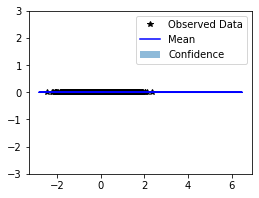

In [0]:
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    # Make predictions
    y_pred = likelihood(gp_6(test_x))

    # Initialize plot
    f, ax = plt.subplots(1, 1, figsize=(4, 3))

    # Get upper and lower confidence bounds
    lower, upper = y_pred.confidence_region()
    # Plot training data as black stars
    ax.plot(X.numpy(), y.numpy(), 'k*')
    # Plot predictive means as blue line
    ax.plot(test_x.numpy(), y_pred.mean.numpy(), 'b')
    # Shade between the lower and upper confidence bounds
    ax.fill_between(test_x.numpy(), lower.numpy(), upper.numpy(), alpha=0.5)
    ax.set_ylim([-3, 3])
    ax.legend(['Observed Data', 'Mean', 'Confidence'])

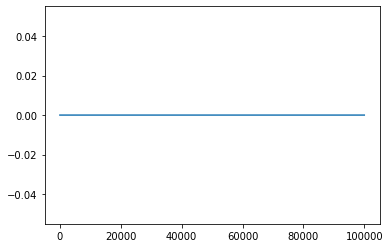

In [0]:
plt.plot(y_pred.mean.numpy())

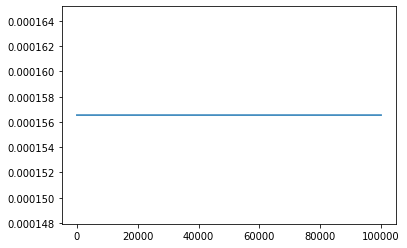

In [0]:
plt.plot(y_pred.variance.numpy())

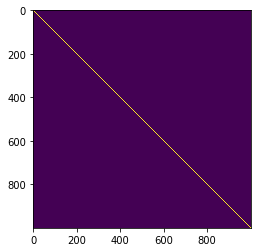

In [0]:
plt.imshow(y_pred.covariance_matrix.detach().numpy(), interpolation='nearest')

In [0]:
gp6_res = residual(y_test, y_pred.mean.numpy(), y_pred.variance.numpy())

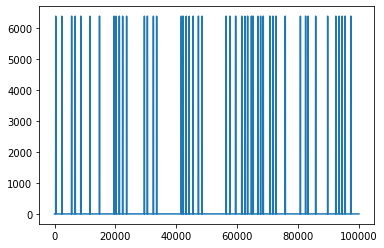

In [0]:
plt.plot(gp6_res)

# Injecting the residuals into LSTM 

Building the LSTM model

In [0]:
%tensorflow_version 2.x
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
from tensorflow.keras import layers

In [0]:
# Initialising the RNN
rnn_lstm = tf.keras.Sequential()

In [0]:
# Adding the LSTM layers and some Dropout regularisation

# Adding the first layer
rnn_lstm.add(layers.GRU(units=200, return_sequences=True, input_shape=(None, 2)))
rnn_lstm.add(layers.Dropout(0.2))

rnn_lstm.add(layers.GRU(units=100, return_sequences=True, input_shape=(None, 200)))
rnn_lstm.add(layers.Dropout(0.2))

# Output layer
rnn_lstm.add(layers.Dense(units=1, activation='sigmoid'))

In [0]:
# Compiling the RNN
rnn_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1_m])
rnn_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 200)         122400    
_________________________________________________________________
dropout (Dropout)            (None, None, 200)         0         
_________________________________________________________________
gru_1 (GRU)                  (None, None, 100)         90600     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
dense (Dense)                (None, None, 1)           101       
Total params: 213,101
Trainable params: 213,101
Non-trainable params: 0
_________________________________________________________________


In [0]:
X_test.shape, y_test.shape, gp4_res.reshape(100,1000).shape

((100, 1000, 1), (100, 1000), (100, 1000))

In [0]:
X_train.reshape(250,1000,2).shape, y_train.shape

((250, 1000, 2), (500, 1000))

In [0]:
import numpy as np
X_test_gp = np.concatenate((X_test ,X_test), axis=2)
X_dev_gp = np.concatenate((X_dev ,X_dev), axis=2)

In [0]:
X_test_gp.shape, X_dev_gp.shape, y_dev.shape

((100, 1000, 2), (100, 2000, 2), (100, 2000))

In [0]:
# Fitting the RNN to training set
rnn = rnn_lstm.fit(X_test_gp, gp4_res.reshape(100,1000), batch_size=32, epochs=80, validation_data=(X_test_gp, y_test), validation_freq=10,verbose=1, workers=4)

Train on 100 samples, validate on 100 samples
Epoch 1/80
100/100 [==============================] - 0s 4ms/sample - loss: -62.2062 - acc: 0.8405 - f1_m: 0.4169
Epoch 2/80
100/100 [==============================] - 0s 3ms/sample - loss: -62.2927 - acc: 0.8400 - f1_m: 0.4550
Epoch 3/80
100/100 [==============================] - 0s 3ms/sample - loss: -62.2841 - acc: 0.8388 - f1_m: 0.4171
Epoch 4/80
100/100 [==============================] - 0s 3ms/sample - loss: -62.2809 - acc: 0.8333 - f1_m: 0.4211
Epoch 5/80
100/100 [==============================] - 0s 3ms/sample - loss: -62.2846 - acc: 0.8265 - f1_m: 0.3876
Epoch 6/80
100/100 [==============================] - 0s 3ms/sample - loss: -62.2939 - acc: 0.8260 - f1_m: 0.3738
Epoch 7/80
100/100 [==============================] - 0s 3ms/sample - loss: -62.3586 - acc: 0.8308 - f1_m: 0.4135
Epoch 8/80
100/100 [==============================] - 0s 3ms/sample - loss: -62.3898 - acc: 0.8372 - f1_m: 0.4004
Epoch 9/80
100/100 [======================

In [0]:
rnn_lstm.evaluate(X_dev_gp, y_dev)

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.395350388288498, 0.90069, 0.51398754]

In [0]:
# # rnn_lstm.save('rnn_lstm_arima')
# rnn_lstm.save("rnn_lstm_arima.h5")
# from keras.models import load_model
 
# # load model
# m = load_model('rnn_lstm_arima.h5')

In [0]:
y_pred=rnn_lstm.predict_proba(X_test_gp)

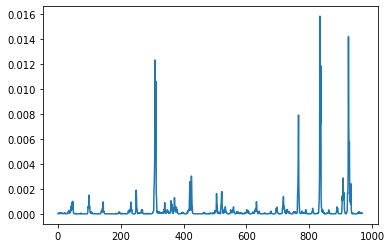

In [0]:
plt.plot(y_pred[4][30:])

In [0]:
X_test.shape, y_pred.shape

((100, 1000, 1), (100, 2000, 1))

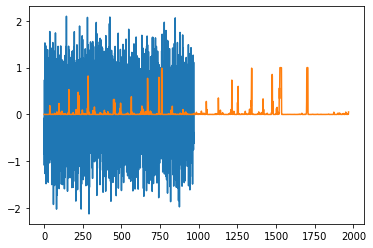

In [0]:
plt.plot(X_test[4,:,0][30:])
plt.plot(y_pred[4][30:])

# Evaluation


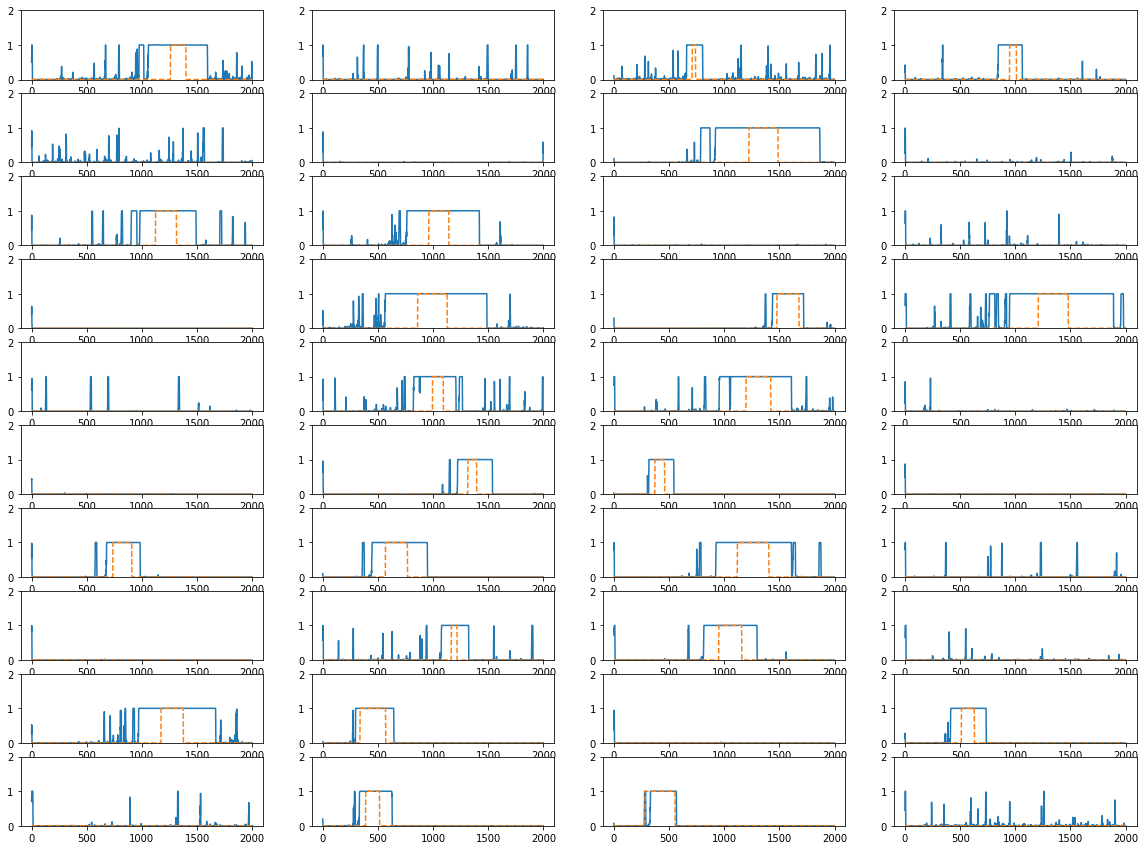

In [0]:
# Generate predictions.
y_pred=rnn_lstm.predict_proba(X_dev_gp)

plt.figure(figsize=(20,15))

for i in range(40):
    plt.subplot(10,4,i+1)
    plt.plot(y_pred[i])
    plt.plot(y_dev[i],'--')
    plt.ylim(0,2)

plt.show()

In [0]:
def plot_data(X, y_label=None, y_pred=None, rows=5, cols=4):
    """Plot the light curve and the associated label. Trims zeroes in X"""
    plot=plt.figure(figsize=(rows * 4, 15))
    for i in range(rows * cols):
        plt.subplot(rows,cols,i+1)
        last_nonzero = np.max(np.nonzero(X[i,:,0]))
        plt.plot(X[i,:last_nonzero,0], '#a0a0a0', label='Light Curve')
        if y_label is not None:
            plt.plot(y_label[i,:last_nonzero], 'r', label='Label')
        if y_pred is not None:
            plt.plot(y_pred[i,:last_nonzero], 'b', label='Prediction')
        if i == 0:
            plt.legend()

    return plot


def plot_history(lc):
    plot=plt.figure()
    plt.plot(lc.history['f1_m'], label = 'Training F1')
    plt.plot(lc.history['val_f1_m'], label = 'Validation F1')
    plt.legend()
    return plot


def plot_curve(y_label, y_pred):
    label_cast_flat = list(itertools.chain(*y_label.astype(int)))
    pred_flat = list(itertools.chain(*y_pred))
    precision, recall, threshold = precision_recall_curve(label_cast_flat, pred_flat)
    f1 = 2 * (precision * recall) / (precision + recall)
    plot = plt.figure()
    plt.plot(threshold, precision[1:], label='Precision')
    plt.plot(threshold, recall[1:], label='Recall')
    plt.plot(threshold, f1[1:], label='F1')
    plt.legend()
    print('Best threshold: ', threshold[np.argmax(f1)-1])
    print('Best F1-Score: ', np.max(f1))
    return plot

def dev_curve(model, X_dev):
    pred = model.predict_proba(X_dev)
    return plot_curve(y_dev, pred)


In [0]:
import itertools
import numpy as np
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats


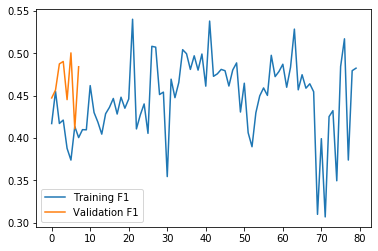

In [0]:
plot=plot_history(rnn)
plot.show()

Best threshold:  0.99999994
Best F1-Score:  0.5258975450546332


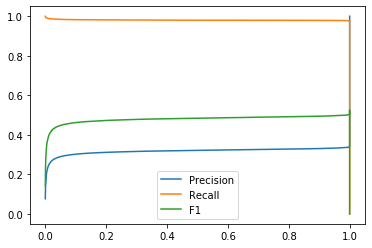

In [0]:
plot=dev_curve(rnn_lstm, X_dev_gp)
plot.show()

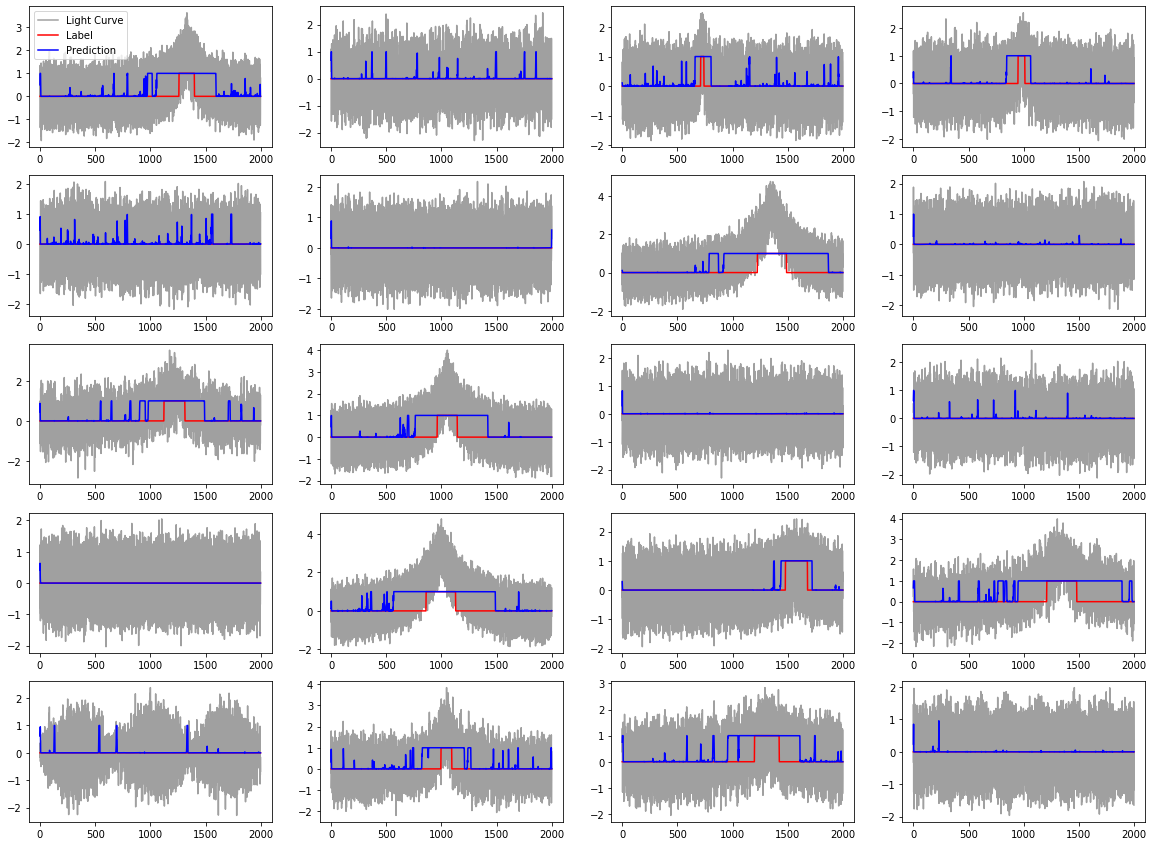

In [0]:
plot=plot_data(X_dev_gp, y_dev, y_pred)
plot.show()